## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials.
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with $1000$ samples in the range of **$-4$** to **$-1$** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of $0$ and std of $5$.

The relationship between the independent variable \( $X$ \) and the dependent variable \( $y$ \) is given by the following equation:

$[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 ]$

Generate the independent variable \( $X$ \) using the `numpy` library and then calculate the dependent variable \( $y$ \) using the given equation.

In [1]:
import numpy as np

def create_polynomial_dataset(start, end, samples, noise=5.0):
    data_points = np.random.uniform(start, end, samples)
    poly_values = 0.1 * data_points**5 + data_points**4 - 2 * data_points**3 + 7 * data_points**2 - 9 * data_points + 3
    random_noise = np.random.normal(0, noise, samples)
    targets = poly_values + random_noise
    return data_points, targets


In [2]:
X, y = create_polynomial_dataset(-4, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

def split_dataset(data, targets, test_size=0.5, seed=100):
    return train_test_split(data, targets, test_size=test_size, random_state=seed)

def generate_out_of_range_data(start, end, num_samples, degree):
    X_out = np.random.uniform(start, end, num_samples)
    y_out = (
        0.1 * X_out**degree +
        X_out**(degree - 1) -
        2 * X_out**(degree - 2) +
        7 * X_out**(degree - 3) -
        9 * X_out**(degree - 4) +
        3**(degree - 5)
    )
    return X_out, y_out

degree = 5

X_train, X_test_in_range, y_train, y_test_in_range = split_dataset(X, y)

X_test_out_of_range, y_test_out_of_range = generate_out_of_range_data(5, 7, len(X_train), degree)


## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def train_polynomial_regression(X, y, degree):
    X_reshaped = X.reshape(-1, 1)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_reshaped, y)
    return model


In [5]:
models = {}
for d in range(2, degree + 3):  # Adjust range to include degree+2
    models[d] = train_polynomial_regression(X_train, y_train, d)


## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [6]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    X_test_reshaped = X_test.reshape(-1, 1)
    for degree, model in models.items():
        y_pred = model.predict(X_test_reshaped)
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses

In [7]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change.


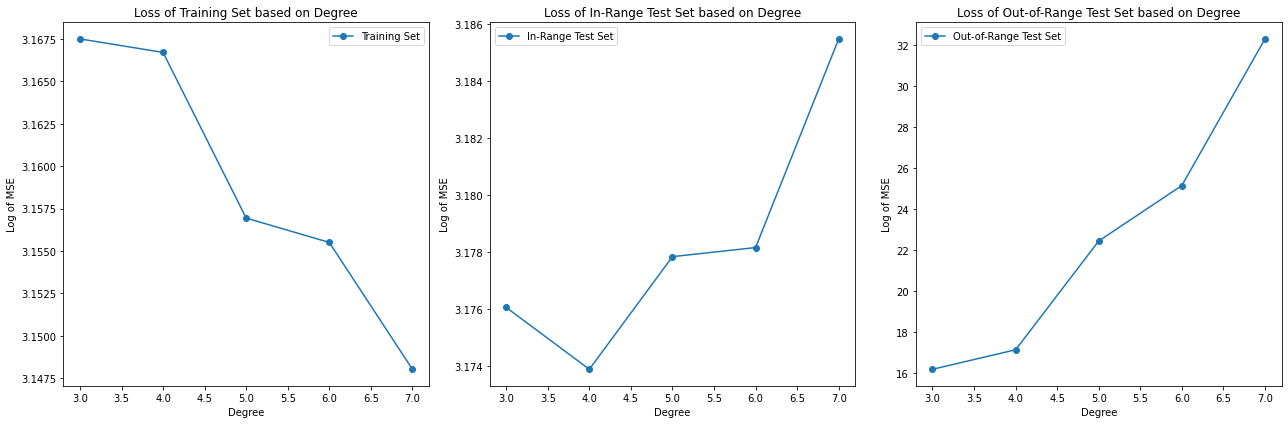

In [8]:
from matplotlib import pyplot as plt
import numpy as np

def plot_losses(ax, degrees, losses, title, label):
    """Plots the logarithm of losses on a given Axes object."""
    ax.plot(degrees, np.log([losses[deg] for deg in degrees]), marker='o', label=label)
    ax.set_title(title)
    ax.set_xlabel('Degree')
    ax.set_ylabel('Log of MSE')
    ax.legend()

# Creating a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Define the range of polynomial degrees we are plotting
degree_range = range(3, 8)

# Plot training, in-range test, and out-of-range test losses
plot_losses(ax1, degree_range, losses_train, 'Loss of Training Set based on Degree', 'Training Set')
plot_losses(ax2, degree_range, losses_in_range, 'Loss of In-Range Test Set based on Degree', 'In-Range Test Set')
plot_losses(ax3, degree_range, losses_out_of_range, 'Loss of Out-of-Range Test Set based on Degree', 'Out-of-Range Test Set')

plt.tight_layout()
plt.show()


## Conclusion (10 Points)

Now print out the losses on each set here.

In [9]:
print("Training Set Losses:", losses_train)
print("In-range Test Set Losses:", losses_in_range)
print("Out-of-range Test Set Losses:", losses_out_of_range)

Training Set Losses: {2: 30.775164447670097, 3: 23.748149783288696, 4: 23.729248598791493, 5: 23.49851323483132, 6: 23.464768625650915, 7: 23.289895058008135}
In-range Test Set Losses: {2: 32.444258279825085, 3: 23.952127101716332, 4: 23.900156486749335, 5: 23.994926995278217, 6: 24.002581832659576, 7: 24.17916075936343}
Out-of-range Test Set Losses: {2: 273079.41397465445, 3: 10823988.716977127, 4: 28025700.495533876, 5: 5643241570.900197, 6: 84147485473.21727, 7: 107180827990406.47}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

In machine learning, when we build models using polynomial regression, we need to balance the bias-variance trade-off. This means that we need to find a model that is not too simple, which would cause high bias, nor too complex, leading to high variance. 

To achieve this balance, we can compare the loss of different sets of data, such as the training set, in-range test set, and out-of-range test set. By doing this, we can observe how the model performs on seen and unseen data, and detect if it is overfitting or underfitting.

Overfitting happens when the model captures noise in the training data, instead of the underlying pattern, leading to poor generalization on unseen data. We can detect overfitting by comparing the loss on the training set with the in-range test set. If the loss on the training set is significantly lower than the loss on the in-range test set, especially for higher degrees, it suggests overfitting. 

Additionally, we can compare the loss on the in-range test set with the out-of-range test set. If the loss on the in-range test set is significantly lower than the loss on the out-of-range test set, especially for higher degrees, it also suggests overfitting. This occurs because the model is not generalizing well to data outside the range of the training set.

Therefore, to avoid overfitting, we need to find a model that balances bias and variance and generalizes well to new data. This can be achieved by selecting an appropriate degree for the polynomial regression model, using regularization techniques, or by using more data to train the model.

Expected to explain overfitiing on the training set and also the face that model has less generalization to unseen data.